In [14]:
import pandas as pd
import networkx as nx
from transliterate import translit
from matplotlib import pyplot as plt
import numpy as np

In [15]:
def transliterate(word):
    return translit(word, "ru", reversed=True)

In [16]:
data = pd.read_csv('data/all.csv', index_col=0)

In [17]:
data.shape

(6478, 52)

In [19]:
data.head(10)

,residence,expedition,name,number of na,russian na,sex,type,year_of_birth,year of death,аварский,...,цудахарский даргинский,чеченский,чирагский даргинский,mother tongue,village population,language population,number of lang,mother tongue match,number of lang strat,elevation
0,Balkhar,"Balkhar, Tsulikana, Shukty, Kuli",Иса,0,0,м,0,1885.0,1965.0,0.0,...,0.0,0.0,0.0,лакский,1195.0,31987.0,0.0,1,0,1658.483887
1,Balkhar,"Balkhar, Tsulikana, Shukty, Kuli",Бет1и,0,0,ж,0,1888.0,1978.0,0.0,...,0.0,0.0,0.0,лакский,1195.0,31987.0,0.0,1,0,1658.483887
2,Balkhar,"Balkhar, Tsulikana, Shukty, Kuli",Абдула,0,0,м,0,1890.0,1972.0,1.0,...,0.0,0.0,0.0,лакский,1195.0,31987.0,2.0,1,2,1658.483887
3,Balkhar,"Balkhar, Tsulikana, Shukty, Kuli",Патимат,0,0,ж,0,1890.0,1985.0,0.0,...,0.0,0.0,0.0,лакский,1195.0,31987.0,0.0,1,0,1658.483887
4,Balkhar,"Balkhar, Tsulikana, Shukty, Kuli",Исмаил,0,0,м,0,1890.0,0.0,1.0,...,0.0,0.0,0.0,лакский,1195.0,31987.0,2.0,1,2,1658.483887
5,Balkhar,"Balkhar, Tsulikana, Shukty, Kuli",Жумяъ/Маи,0,0,ж,0,1890.0,1967.0,0.0,...,0.0,0.0,0.0,лакский,1195.0,31987.0,0.0,1,0,1658.483887
6,Balkhar,"Balkhar, Tsulikana, Shukty, Kuli",Асият,0,0,ж,0,1893.0,1973.0,0.0,...,0.0,0.0,0.0,лакский,1195.0,31987.0,0.0,1,0,1658.483887
7,Balkhar,"Balkhar, Tsulikana, Shukty, Kuli",Айшат,0,0,ж,0,1895.0,1975.0,0.0,...,0.0,0.0,0.0,лакский,1195.0,31987.0,0.0,1,0,1658.483887
8,Balkhar,"Balkhar, Tsulikana, Shukty, Kuli",Уди,0,0,ж,0,1895.0,1981.0,0.0,...,0.0,0.0,0.0,лакский,1195.0,31987.0,0.0,1,0,1658.483887
9,Balkhar,"Balkhar, Tsulikana, Shukty, Kuli",Амир,1,0,м,0,1900.0,1971.0,0.0,...,0.0,0.0,0.0,лакский,1195.0,31987.0,0.0,1,0,1658.483887


In [20]:
data.columns

Index(['residence', 'expedition', 'name', 'number of na', 'russian na', 'sex',
       'type', 'year_of_birth', 'year of death', 'аварский', 'агульский',
       'азербайджанский', 'азербайджанский или кумыкский',
       'акушинский даргинский', 'андийский', 'арчинский', 'ахвахский',
       'багвалинский', 'бежтинский', 'ботлихский', 'гапшиминский даргинский',
       'гдымско-фийский лезгинский', 'гинухский', 'грузинский', 'даргинский',
       'кадарский даргинский', 'кайтагский даргинский', 'каратинский',
       'кубачинский даргинский', 'кумыкский', 'лакский', 'лезгинский',
       'мегебский', 'муиринский даргинский', 'русский', 'рутульский',
       'сирхинский даргинский', 'табасаранский', 'тукитинский',
       'хновский рутульский', 'цахурский', 'цезский', 'цудахарский даргинский',
       'чеченский', 'чирагский даргинский', 'mother tongue',
       'village population', 'language population', 'number of lang',
       'mother tongue match', 'number of lang strat', 'elevation'],
      

In [21]:
len(data['mother tongue'].unique())

29

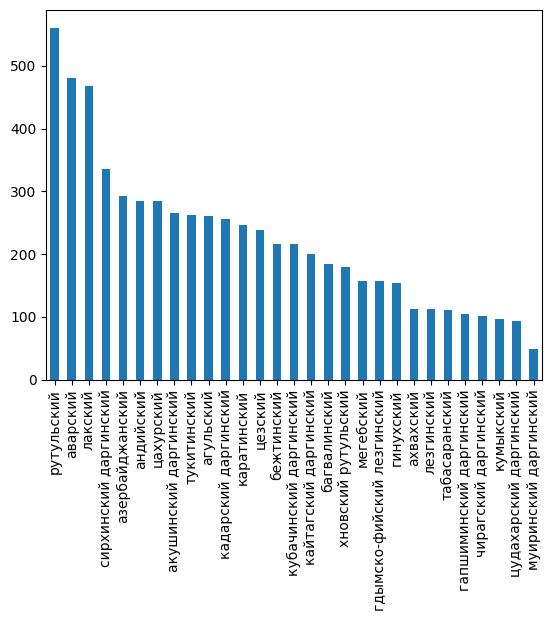

In [22]:
# plot the number of speakers per mother tongue
data['mother tongue'].value_counts().plot(kind='bar')
plt.show()

In [23]:
data.set_index('mother tongue', inplace=True)

In [29]:
matrix = data.loc[:, 'аварский': 'чирагский даргинский']
# only keep columns that are in len(data.index.unique())
matrix = matrix.loc[:, matrix.columns.isin(data.index.unique())]
matrix = matrix.astype(int)
matrix.columns

Index(['аварский', 'агульский', 'азербайджанский', 'акушинский даргинский',
       'андийский', 'ахвахский', 'багвалинский', 'бежтинский',
       'гапшиминский даргинский', 'гдымско-фийский лезгинский', 'гинухский',
       'кадарский даргинский', 'кайтагский даргинский', 'каратинский',
       'кубачинский даргинский', 'кумыкский', 'лакский', 'лезгинский',
       'мегебский', 'муиринский даргинский', 'рутульский',
       'сирхинский даргинский', 'табасаранский', 'тукитинский',
       'хновский рутульский', 'цахурский', 'цезский', 'цудахарский даргинский',
       'чирагский даргинский'],
      dtype='object')

In [45]:
# group by 'mother tongue' and sum
matrix = matrix.groupby(matrix.index).sum()
# turn to percentage
matrix = matrix.div(matrix.sum(axis=1), axis=0)
# add missing languages from columns to index
matrix = matrix.reindex(matrix.columns, axis=0, fill_value=0)
# if column == index, set to 0
matrix = matrix.where(matrix != matrix.T, 0)
# turn Nan to 0
matrix = matrix.fillna(0)

In [46]:
# if less that 5% of speakers speak 
# the language then set the relation to 0
matrix = matrix.where(matrix > 0.05, 0)

In [47]:
# # apply transliteration to index and columns
matrix.index = matrix.index.map(transliterate)
matrix.columns = matrix.columns.map(transliterate)

In [49]:
# convert matrix into a long dataframe with directed edges as rows
df = matrix.stack().reset_index()
df.columns = ['source', 'target', 'weight']
df.head()

# save to csv
df.to_csv('data/edges.csv', index=False)

In [39]:
# convert matrix into a networkx graph
G = nx.from_numpy_array(matrix.values)
# add direction to edges
G = nx.Graph(G)
# set node names
G = nx.relabel_nodes(G, dict(zip(range(len(matrix.columns)), matrix.columns)))

# get pos from G
pos = nx.spring_layout(G, k=1, iterations=5000)

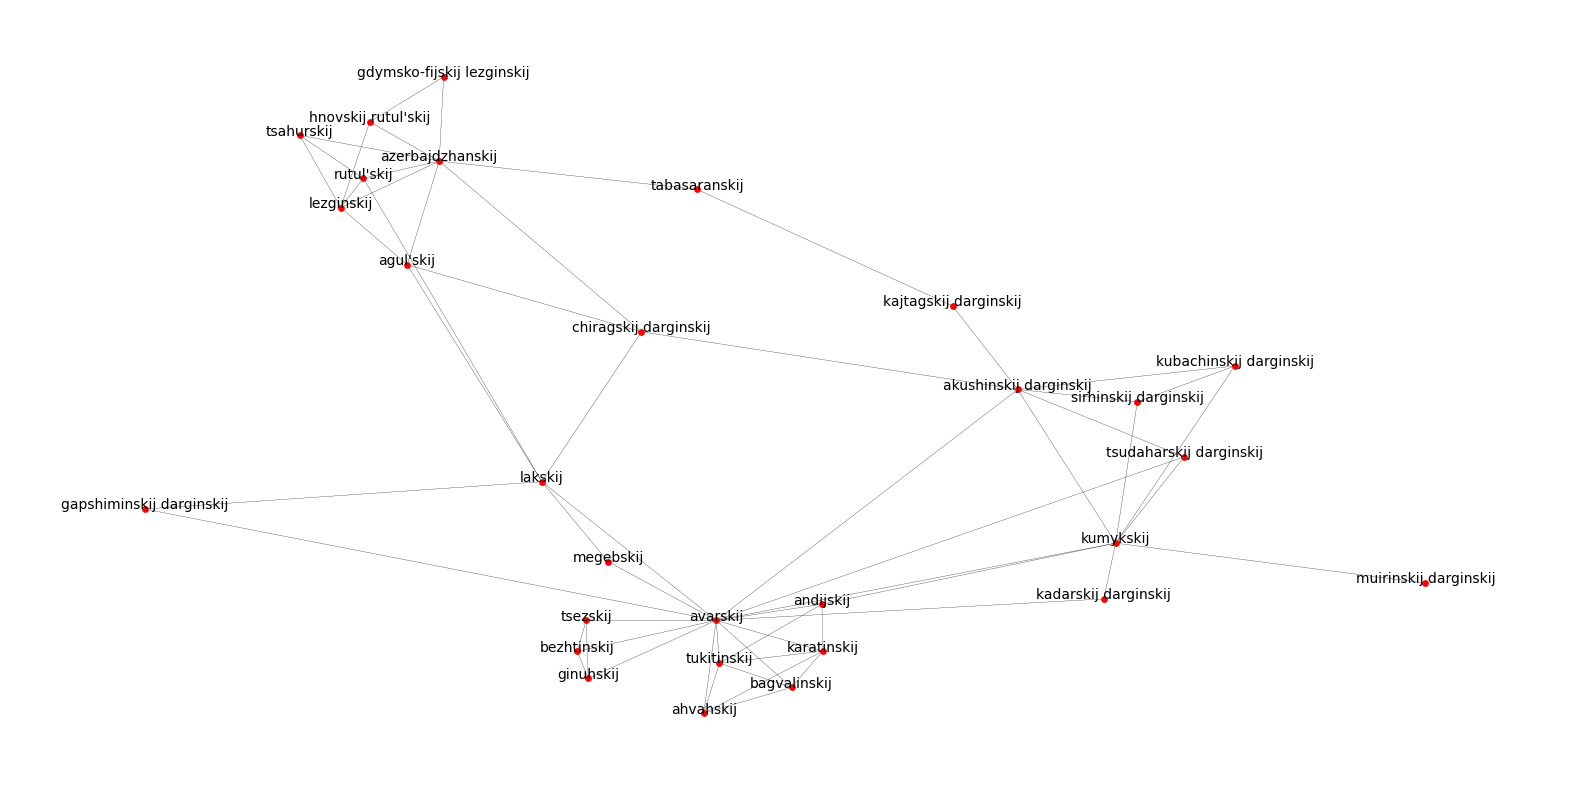

In [43]:
# raise labels above edges
pos_higher = {}
y_off = 0.01  # offset on the y axis
for k, v in pos.items():
    pos_higher[k] = (v[0], v[1] + y_off)

plt.figure(figsize=(20,10))
nx.draw_networkx_edges(G, pos, alpha=1, width=0.2)
nx.draw_networkx_nodes(G, pos, node_size=15, node_color='red')
nx.draw_networkx_labels(G, pos_higher, font_size=10, 
                        font_family='sans-serif', alpha=1)
_ = plt.axis('off')

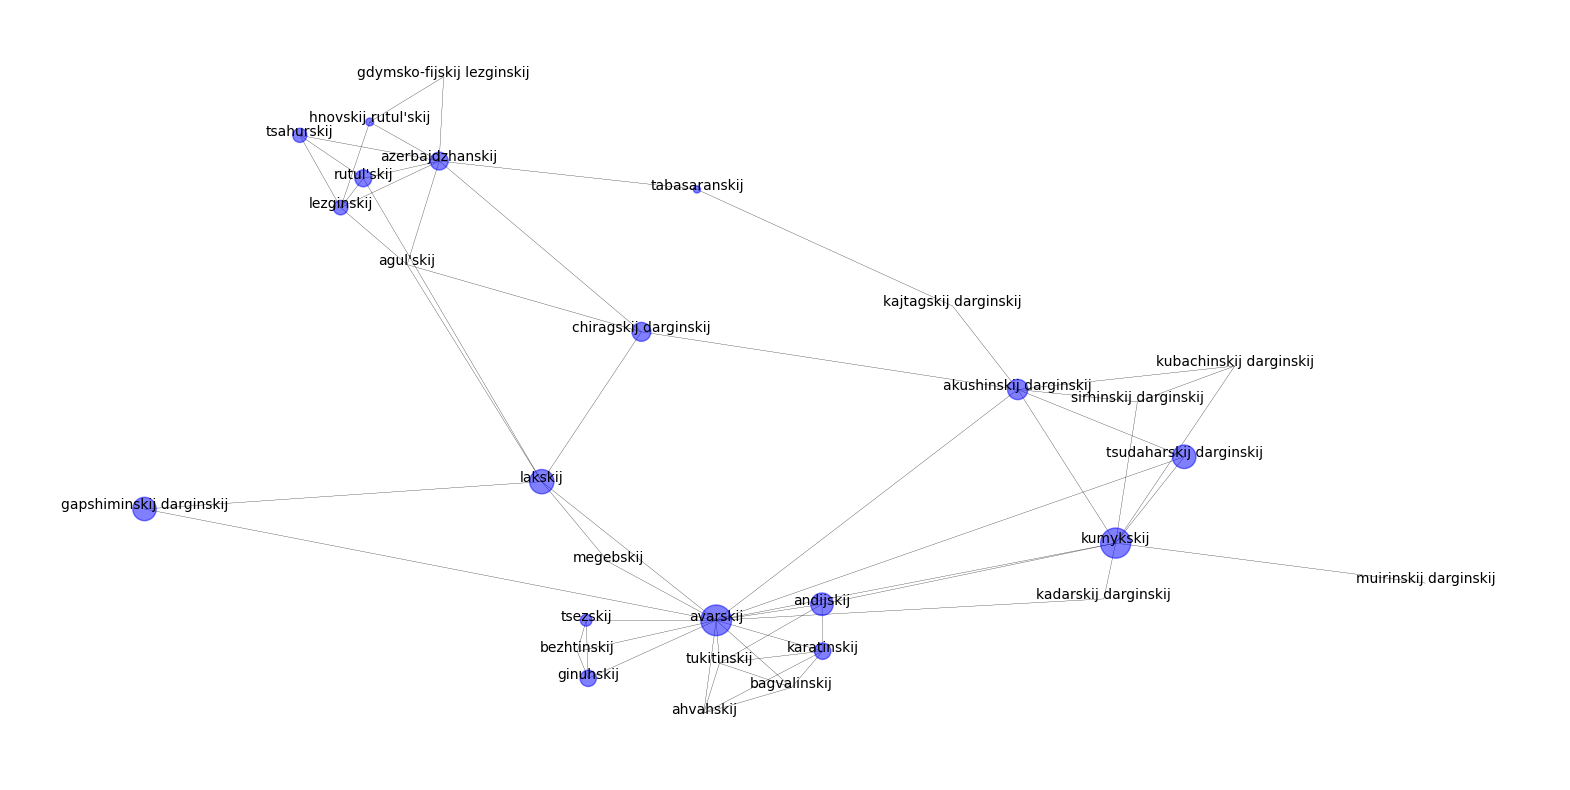

In [42]:
# compute betweenness centrality
betweenness = nx.betweenness_centrality(G, weight='weight')
plt.figure(figsize=(20,10))
nx.draw_networkx_edges(G, pos, alpha=1, width=0.2)
# add nodes without size
nx.draw_networkx_nodes(G, pos, nodelist=betweenness.keys(),
                          node_size=[v * 1000 for v in betweenness.values()],  
                            node_color='blue', alpha=0.5)
nx.draw_networkx_labels(G, pos_higher, font_size=10,
                        font_family='sans-serif', alpha=1)
_ = plt.axis('off')